<a href="https://colab.research.google.com/github/mauronk/Alura-QuarentenaDados/blob/master/MeuQuarentenaDados2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
filmes =  pd.read_csv("https://raw.githubusercontent.com/mauronk/bases/master/movies.csv")
filmes.columns = ["filmeId", "titulo", "generos"]
avaliacoes = pd.read_csv("https://raw.githubusercontent.com/mauronk/bases/master/ratings.csv")
avaliacoes.columns = ["usuarioId","filmeId","nota","momento"]
notas_medias_por_filme = avaliacoes.groupby("filmeId")["nota"].mean()
filmes_com_media = filmes.join(notas_medias_por_filme, on="filmeId")
filmes_com_media.columns = ["filmeId","titulo","generos","media"]
filmes_com_media

,filmeId,titulo,generos,media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000
9739,193585,Flint (2017),Drama,3.500000
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000


dicas para comandos tipo SLQ em Pandas

https://towardsdatascience.com/pandas-equivalent-of-10-useful-sql-queries-f79428e60bd9

tarefas no excel
https://towardsdatascience.com/learn-how-to-easily-do-3-advanced-excel-tasks-in-python-925a6b7dd081

In [2]:
filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False)

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

acessando o indice ou os valores da series gerada

In [3]:
filmes["generos"].str.get_dummies('|').sum().sort_index(ascending=True).index

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')

In [4]:
filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False).values

array([4361, 3756, 1894, 1828, 1596, 1263, 1199,  980,  978,  779,  664,
        611,  573,  440,  382,  334,  167,  158,   87,   34])

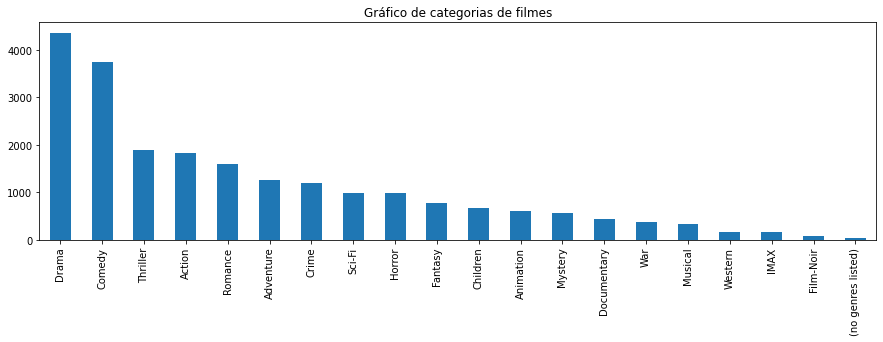

In [5]:
filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False).plot(
    kind='bar', title='Gráfico de categorias de filmes', figsize=(15,4))


plotando gráfico com **seaborn**

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


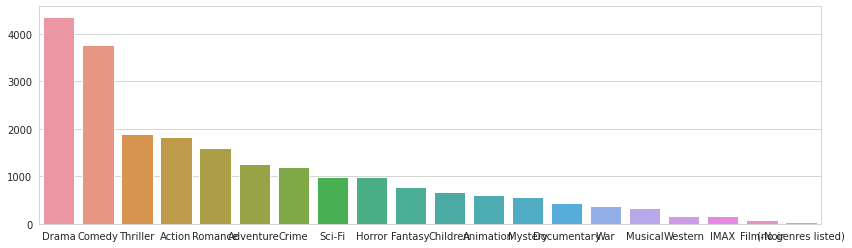

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
filmes_por_genero = filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(14,4))
sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values)
plt.show()

A média do filme 1 é 3.9209302325581397


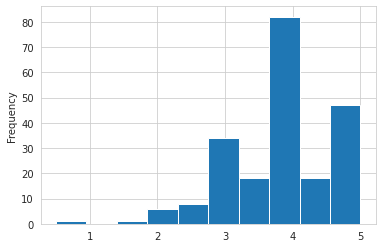

In [7]:
print(f"A média do filme 1 é {avaliacoes.query('filmeId==1')['nota'].mean()}")
avaliacoes.query("filmeId==1")["nota"].plot(kind='hist')
plt.show()

# função **plot_filme(n)**

retorna um gráfico com os votos para o filme

A média do filme ['Toy Story (1995)'] é 3.92


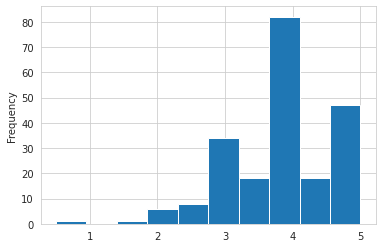

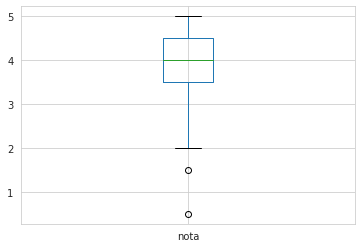

count    215.000000
mean       3.920930
std        0.834859
min        0.500000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: nota, dtype: float64

In [8]:
def plot_filme(n):
  xmed=avaliacoes.query(f'filmeId=={n}')['nota'].mean()
  xnome=filmes_com_media.query(f"filmeId=={n}")["titulo"].values
  print(f"A média do filme {xnome} é {round(xmed,2)}")
  notas_do_filme = avaliacoes.query(f"filmeId=={n}")["nota"]
  notas_do_filme.plot(kind='hist')
  plt.show()
  notas_do_filme.plot.box()
  plt.show()
  return notas_do_filme.describe()
plot_filme(1)

A média do filme ['Wizard of Oz, The (1939)'] é 3.88


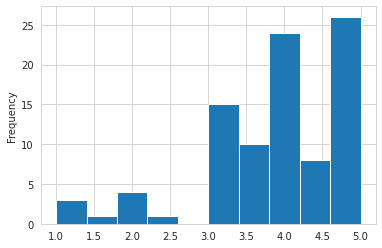

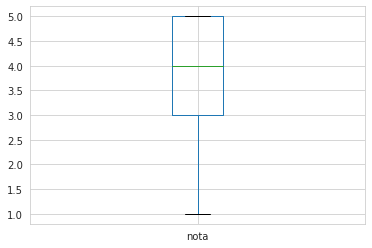

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64

In [9]:
plot_filme(919)

A média do filme ['Little Miss Sunshine (2006)'] é 3.88


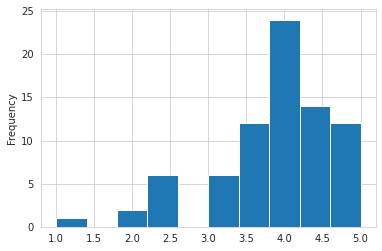

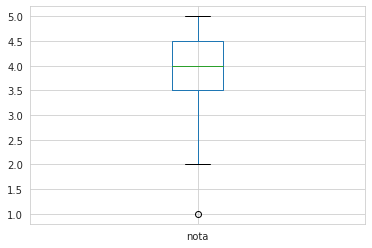

count    77.000000
mean      3.883117
std       0.842522
min       1.000000
25%       3.500000
50%       4.000000
75%       4.500000
max       5.000000
Name: nota, dtype: float64

In [10]:
plot_filme(46578)

###boxplot com seaborn

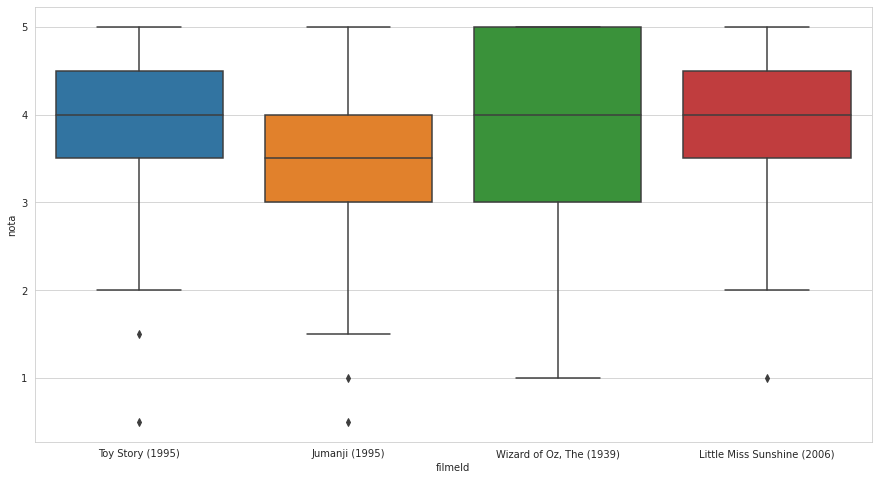

In [11]:
#---- modo complicado que eu fiz juntando tudo
# dado=avaliacoes.query('filmeId in [1,2,919,46578]')
# dado2=filmes.query('filmeId in [1,2,919,46578]')
# dado2b=dado2['titulo']
# dado2b.index=list(dado2['filmeId'])
# dado3 = dado.join(dado2b,on='filmeId')
# sns.boxplot(data=dado3,x='titulo',y='nota')
#-------
legenda=filmes.query('filmeId in [1,2,919,46578]')['titulo']

plt.figure(figsize=(15,8))
sns.boxplot(data=avaliacoes.query('filmeId in [1,2,919,46578]'),x='filmeId',y='nota').set(xticklabels=legenda)

plt.show()

## Desafio 1 do Guilherme Silveira

Rotacionar os thicks (os nomes dos generos) do gráfico de barras verdes (o último), de forma a deixar as legendas mais legíveis.

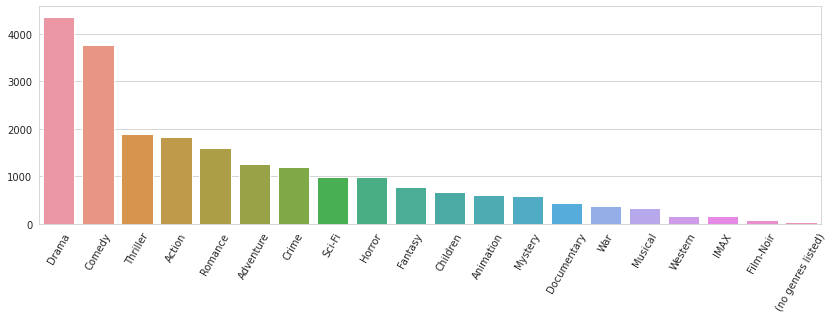

In [12]:
sns.set_style("whitegrid")
filmes_por_genero = filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(14,4))
sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values)
plt.xticks(rotation=60)
plt.show()

##Desafio 2 do Paulo Silveira

Encontar vários filmes com médias próximas e distribuições diferentes, use a função plot_filmes(n) para plotar.


R:

Fiz acima testando o plot_filmes

##Desafio 3 do Paulo Silveira

Criar o boxplot dos 10 filmes com mais votos (não é com maior média, é com mais votos!). Não apenas plot mas também analise e tente tirar conclusões.


[356, 318, 296, 593, 2571, 260, 480, 110, 589, 527]


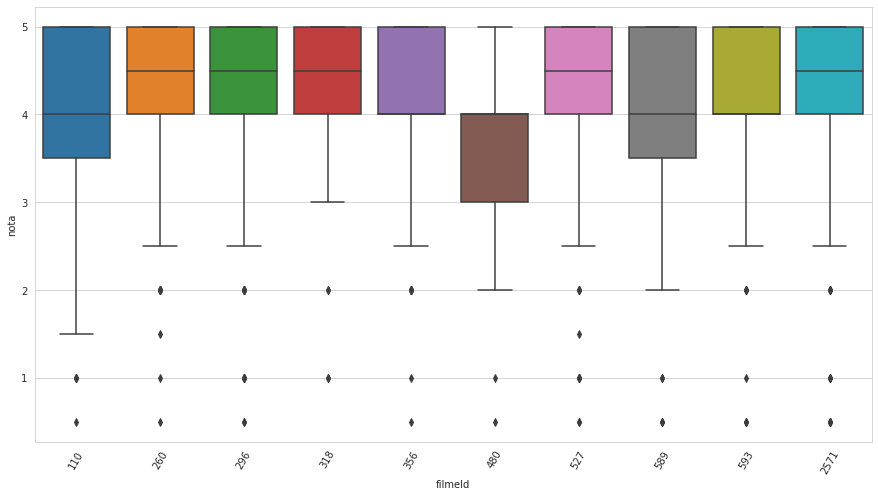

In [13]:
mais_votados=avaliacoes.groupby("filmeId")["nota"].count().sort_values(ascending=False).head(10)
mais_votados_Ids = mais_votados.index.tolist()
print(f"{mais_votados_Ids}")
filmes_com_media.join(avaliacoes.groupby("filmeId")["nota"].count(), on='filmeId').sort_values(by='nota', ascending=False).head(10)

plt.figure(figsize=(15,8))
sns.boxplot(data=avaliacoes.query(f'filmeId in {mais_votados_Ids}'),x='filmeId',y='nota')
plt.xticks(rotation=60)
#sns.boxplot(data=avaliacoes.query(f'filmeId in {mais_votados.index.values}'),x='filmeId',y='nota')
plt.show()

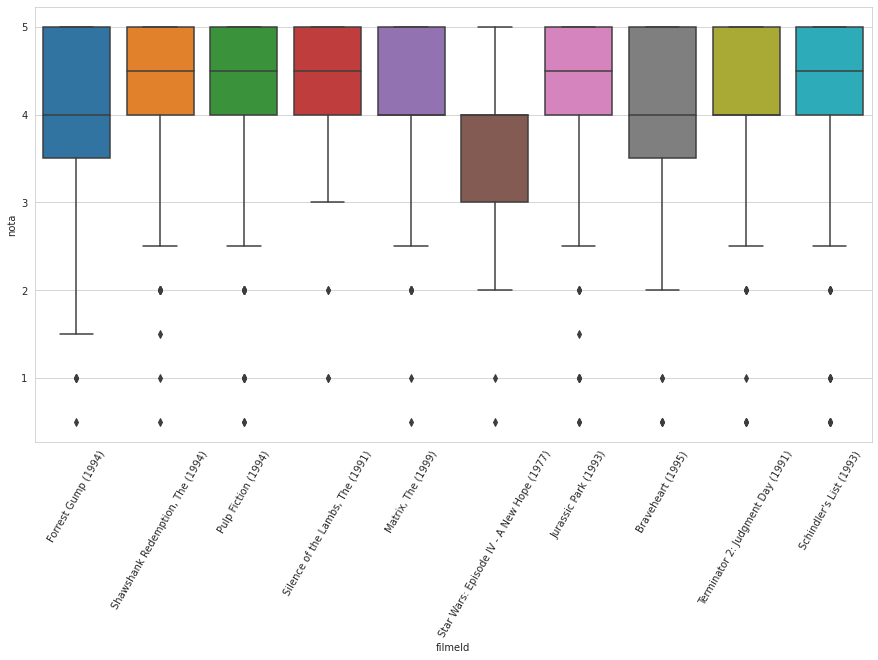

In [14]:
total_votos_por_filme=avaliacoes.groupby('filmeId')['nota'].count()
filmes_com_media_votos = filmes_com_media.join(total_votos_por_filme,on="filmeId")
filmes_com_media_votos = filmes_com_media_votos.rename(columns={'nota':'total_votos'})
top10 = filmes_com_media_votos.sort_values(by='total_votos', ascending=False).head(10)
top10_titulos = top10['titulo'].to_list()
top10_Ids = top10['filmeId'].to_list()


plt.figure(figsize=(15,8))
ax=sns.boxplot(data=avaliacoes.query(f'filmeId in {top10_Ids}'),x='filmeId',y='nota')
ax.set_xticklabels(top10_titulos)
plt.xticks(rotation=60)
plt.show()

##Desafio 4 do Guilherme Silveira

Configurar a visualização do boxplot gerado pelo seaborn (último boxplot plotado na aula). Configurar o tamanho e colocar o nome dos filmes nos thicks.


###Alterei direto no exercício acima

##Desafio 5 do Allan Spadini

Calcular moda, média e mediana dos filmes. Explore filmes com notas mais próximas de 0.5, 3 e 5.


##Desafio 6 da Thais André

Plotar o boxplot e o histograma um do lado do outro (na mesma figura ou em figuras distintas, mas um do lado do outro).


##Desafio 7 do Thiago Gonçalves

Criar um gráfico de notas médias por ano (média geral considerando todos os filmes lançados naquele ano).
